In [1]:
import tensorflow as tf
import keras_core as keras

2023-11-27 13:20:47.849624: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 13:20:47.850342: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 13:20:48.105961: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 13:20:48.428229: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 13:20:52.590881: W tensorflow/compiler/tf2

Using TensorFlow backend


In [3]:
import numpy as np

In [4]:
layer = tf.keras.layers.Dropout(0.2, input_shape=(2,))
data = np.arange(10).reshape(5, 2).astype(np.float32)
print(data)

[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]


In [29]:
outputs = layer(data, training=True)
print(outputs)

tf.Tensor(
[[0.   0.  ]
 [2.5  3.75]
 [5.   6.25]
 [0.   0.  ]
 [0.   0.  ]], shape=(5, 2), dtype=float32)


In [5]:
a = [i for i in range(100)]
a[:-95]

[0, 1, 2, 3, 4]

In [2]:
(X_train, Y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, y_train = X_train[:-5000], Y_train[:-5000]
x_valid, y_valid = X_train[-5000:], Y_train[-5000:]
x_train, x_valid, x_test = (
    x_train.reshape(-1, 784).astype("float32") / 255.0,
    x_valid.reshape(-1, 784).astype("float32") / 255.0,
    x_test.reshape(-1, 784).astype("float32") / 255.0,
)

In [3]:
keras.backend.clear_session()
tf.random.set_seed(seed=42)
model_inputs = keras.Input(shape=(784,))
norm_layer = keras.layers.Normalization()
hidden_layer_type_1 = keras.layers.Dense(
    units=100,
    activation=keras.activations.relu,
    kernel_initializer=keras.initializers.HeNormal(seed=42),
)
hidden_layer_type_1_1 = keras.layers.Dense(
    units=100,
    activation=keras.activations.relu,
    kernel_initializer=keras.initializers.HeNormal(seed=42),
)
hidden_layer_type_1_2 = keras.layers.Dense(
    units=100,
    activation=keras.activations.relu,
    kernel_initializer=keras.initializers.HeNormal(seed=42),
)
hidden_layer_type_1_3 = keras.layers.Dense(
    units=100,
    activation=keras.activations.relu,
    kernel_initializer=keras.initializers.HeNormal(seed=42),
)
hidden_layer_type_2 = keras.layers.Dense(
    units=50,
    activation=keras.activations.relu,
    kernel_initializer=keras.initializers.HeNormal(seed=42),
)
hidden_layer_type_2_1 = keras.layers.Dense(
    units=50, activation=keras.activations.relu)
layer_outputs = keras.layers.Dense(
    units=10, activation=keras.activations.softmax)

In [4]:
output_norm_layer = norm_layer(model_inputs)
output_hidden_layer_1 = hidden_layer_type_1(output_norm_layer)
output_hidden_layer_2 = hidden_layer_type_1_1(output_hidden_layer_1)
output_hidden_layer_3 = hidden_layer_type_1_2(output_hidden_layer_2)
output_hidden_layer_4 = hidden_layer_type_1_3(output_hidden_layer_3)
output_hidden_layer_5 = hidden_layer_type_2(output_hidden_layer_4)
output_hidden_layer_6 = hidden_layer_type_2_1(output_hidden_layer_5)
model_outputs = layer_outputs(output_hidden_layer_6)

2023-11-21 11:24:30.578901: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-21 11:24:30.680133: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-21 11:24:30.680201: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-21 11:24:30.684615: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-21 11:24:30.684897: I external/local_xla/xla/stream_executor

In [5]:
Fmnist_model = keras.Model(
    inputs=model_inputs, outputs=model_outputs, name="Fmnist_model"
)

In [6]:
[(var.name, var.trainable, type(var)) for var in Fmnist_model.layers[1].variables]

[('mean', False, keras_core.src.backend.tensorflow.core.Variable),
 ('variance', False, keras_core.src.backend.tensorflow.core.Variable),
 ('count', False, keras_core.src.backend.tensorflow.core.Variable)]

In [16]:
Fmnist_model.layers[2].variables

[<KerasVariable shape=(784, 100), dtype=float32, path=dense/kernel>,
 <KerasVariable shape=(100,), dtype=float32, path=dense/bias>]

In [176]:
Fmnist_model.layers[8].weights[1].name

'dense_6/bias:0'

In [166]:
a.name

AttributeError: 'list' object has no attribute 'name'

In [134]:
Fmnist_model.layers[3].get_weights()[0][0, 0]

0.0025429823

In [135]:
Fmnist_model.layers[4].get_weights()[0][0, 0]

0.0025429823

In [136]:
Fmnist_model.layers[5].get_weights()[0][0, 0]

0.0025429823

In [138]:
Fmnist_model.layers[6].get_weights()[0][0, 0]

0.0025429823

In [139]:
Fmnist_model.layers[7].get_weights()[0][0, 0]

-0.22350265

In [106]:
a

array([[ 0.07735777, -0.02853563, -0.00383064, ..., -0.10935522,
        -0.08865669, -0.11547692],
       [ 0.07515115, -0.15891244,  0.01470369, ..., -0.14139071,
        -0.02505824, -0.08036654],
       [ 0.03290802, -0.00598687, -0.05592826, ...,  0.11303285,
        -0.06275792,  0.14658335],
       ...,
       [-0.05696899, -0.0223776 , -0.09313046, ...,  0.12464151,
         0.0706367 , -0.03658265],
       [ 0.13369405,  0.01775797, -0.1572477 , ...,  0.03269626,
        -0.0968674 , -0.10366027],
       [-0.07203901,  0.1442813 ,  0.11274427, ...,  0.06068057,
         0.13749143, -0.12786654]], dtype=float32)

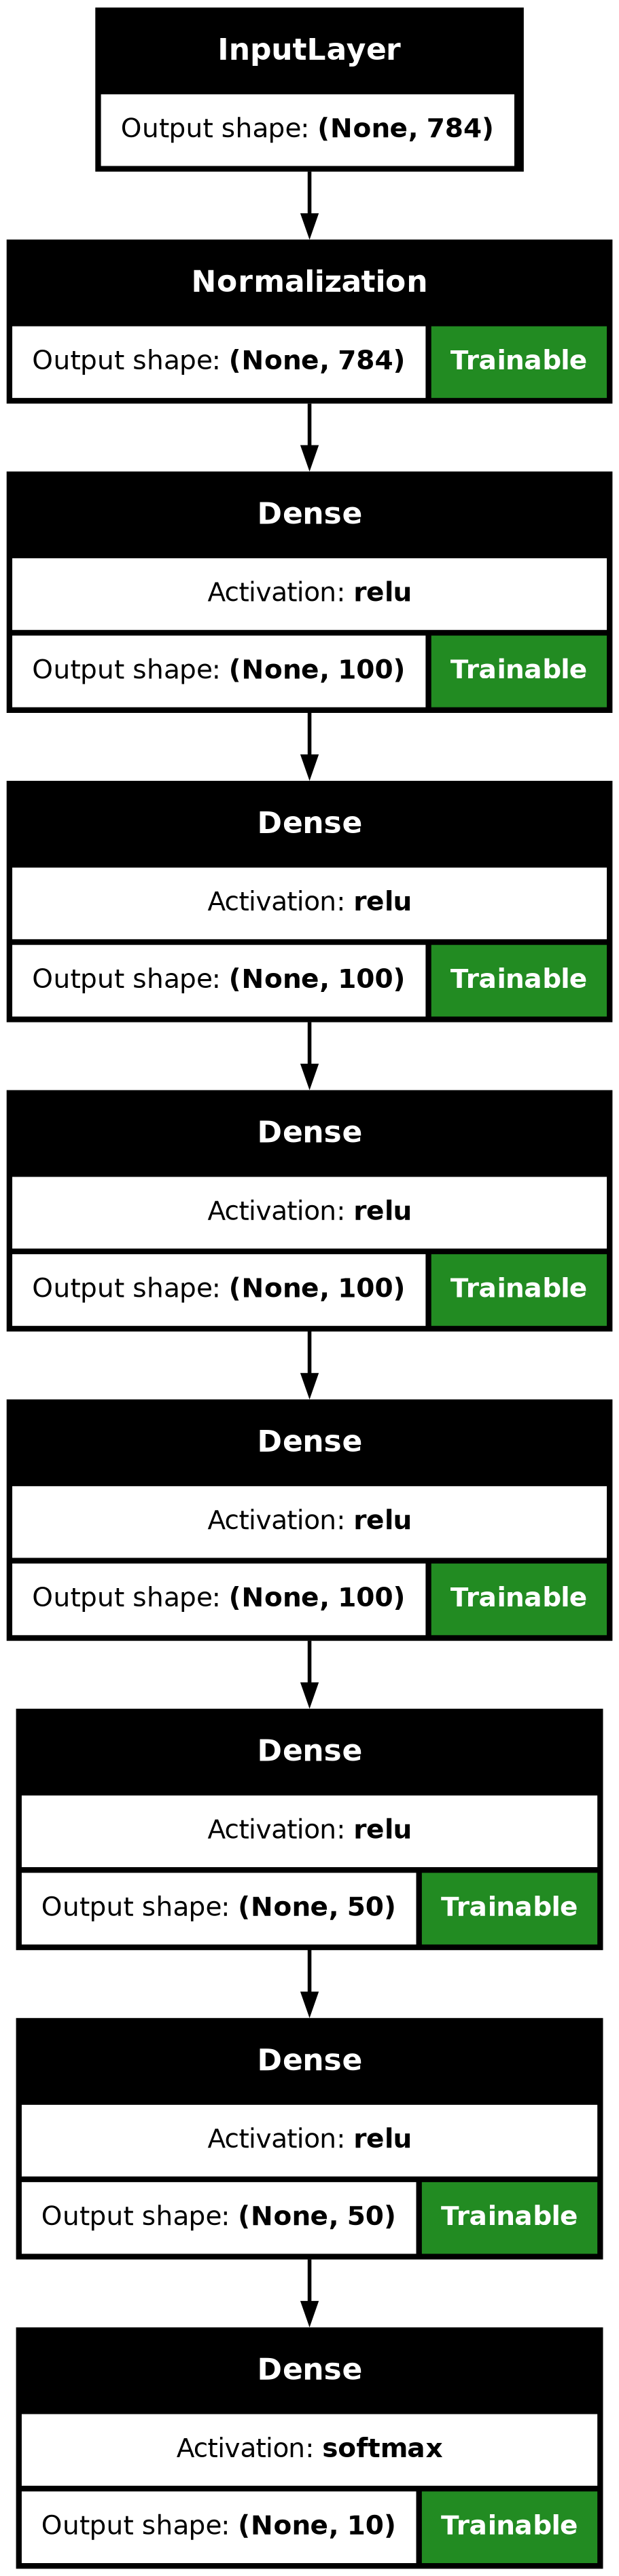

In [8]:
keras.utils.plot_model(
    model=Fmnist_model,
    show_shapes=True,
    show_trainable=True,
    show_layer_activations=True,
)

In [17]:
Fmnist_model.summary(show_trainable=True)

Model: "Fmnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape             ┃ Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 784)              │       0 │   -   │
├─────────────────────────────┼──────────────────────────┼─────────┼───────┤
│ normalization               │ (None, 784)              │   1,569 │   Y   │
│ (Normalization)             │                          │         │       │
├─────────────────────────────┼──────────────────────────┼─────────┼───────┤
│ dense (Dense)               │ (None, 100)              │  78,500 │   Y   │
├─────────────────────────────┼──────────────────────────┼─────────┼───────┤
│ dense_1 (Dense)             │ (None, 100)              │  10,100 │   Y   │
├─────────────────────────────┼──────────────────────────┼─────────┼───────┤
│ dense_2 (Dense)             │ (None, 100)              │  10,100 │   Y   │
├─────────────────────────────┼──────────────────────────┼─────────┼───────┤
│ dense_3 (Dense)             │ (None, 100)              │  10,100 │   Y   │
├─────────────────────────────┼──────────────────────────┼─────────┼───────┤
│ dense_4 (Dense)             │ (None, 50)               │   5,050 │   Y   │
├─────────────────────────────┼──────────────────────────┼─────────┼───────┤
│ dense_5 (Dense)             │ (None, 50)               │   2,550 │   Y   │
├─────────────────────────────┼──────────────────────────┼─────────┼───────┤
│ dense_6 (Dense)             │ (None, 10)               │     510 │   Y   │
└─────────────────────────────┴──────────────────────────┴─────────┴───────┘

 Total params: 118,479 (462.81 KB)

 Trainable params: 116,910 (456.68 KB)

 Non-trainable params: 1,569 (6.13 KB)

In [9]:
optimizer = keras.optimizers.SGD(learning_rate=0.0001)
loss = keras.losses.SparseCategoricalCrossentropy()
metircs = keras.metrics.SparseCategoricalAccuracy()
Fmnist_model.compile(loss=loss, optimizer=optimizer, metrics=[metircs])

In [10]:
class CustomCallbackh(keras.callbacks.Callback):
    def __init__(self, *, retio, patience=0):
        super().__init__()
        self.retio = retio
        self.patience = patience
        self.epoch_val = []
        self.Retio = []

    def on_epoch_end(self, epoch, logs={}):
        self.epoch_val.append(logs["val_loss"])
        self.Retio.append(
            abs(
                (self.epoch_val[epoch] - self.epoch_val[epoch - 1])
                / self.epoch_val[epoch]
            )
        )
        print("\n"+
            "\033[1m"
            + "\033[35m"
            + "{}".format(self.Retio[epoch])
            + "\033[0m"
            + "\033[22m"
            + "\033[24m",
        )
        if len(self.Retio) > self.patience:
            if all(x < self.retio for x in self.Retio[-self.patience :]):
                self.model.stop_training = True
                print("\n"+
                    "\033[4m"
                    + "\033[1m"
                    + "\033[32m"
                    + "Early stopping"
                    + "\033[0m"
                    + "\033[22m"
                    + "\033[24m",
                )

        print("\n"+
            "\033[1m"
            + "\033[31m"
            + "End epoch {} of training; got log keys: {}".format(epoch + 1, logs)
            + "\033[0m"
            + "\033[22m"
            + "\033[24m",
        )
        return self.Retio

In [12]:
import pathlib
import time


def set_path_dir(root_path: str = "mylogs"):
    return str(pathlib.Path(root_path) / time.strftime("run-%Y-%m-%d-%H-%M"))


logs = set_path_dir(root_path="mylogs")

In [13]:
callback_1 = CustomCallbackh(retio=0.05, patience=5)
callback_2 = keras.callbacks.TensorBoard(log_dir=logs)

In [14]:
norm_layer.adapt(x_train)

In [14]:
history = Fmnist_model.fit(
    x=x_train,
    y=y_train,
    epochs=10,
    verbose=1,
    validation_data=(x_valid, y_valid),
    callbacks=[callback_1, callback_2],
)

2023-11-21 11:32:00.004683: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Epoch 1/10


2023-11-21 11:32:01.938306: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.
2023-11-21 11:32:02.471766: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.
2023-11-21 11:32:06.672515: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3f8c003ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-21 11:32:06.672588: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2023-11-21 11:32:06.864029: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-21 11:32:36.292364: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1700553760.440573   28166 device_compiler

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3951 - sparse_categorical_accuracy: 0.0888

W0000 00:00:1700553777.961396   28168 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


0.0
End epoch 1 of training; got log keys: {'loss': 2.3257975578308105, 'sparse_categorical_accuracy': 0.11192727088928223, 'val_loss': 2.2407009601593018, 'val_sparse_categorical_accuracy': 0.15479999780654907}
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 58s 11ms/step - loss: 2.3950 - sparse_categorical_accuracy: 0.0888 - val_loss: 2.2407 - val_sparse_categorical_accuracy: 0.1548
Epoch 2/10


2023-11-21 11:33:00.162908: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.
2023-11-21 11:33:05.522014: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1717/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2200 - sparse_categorical_accuracy: 0.17830.040014328416875924
End epoch 2 of training; got log keys: {'loss': 2.197206735610962, 'sparse_categorical_accuracy': 0.20636363327503204, 'val_loss': 2.1544904708862305, 'val_sparse_categorical_accuracy': 0.26660001277923584}
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 2.2200 - sparse_categorical_accuracy: 0.1783 - val_loss: 2.1545 - val_sparse_categorical_accuracy: 0.2666
Epoch 3/10


2023-11-21 11:33:21.330585: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1716/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.1340 - sparse_categorical_accuracy: 0.29490.04568486918622984
End epoch 3 of training; got log keys: {'loss': 2.1092000007629395, 'sparse_categorical_accuracy': 0.32445454597473145, 'val_loss': 2.0603630542755127, 'val_sparse_categorical_accuracy': 0.3792000114917755}
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 2.1340 - sparse_categorical_accuracy: 0.2950 - val_loss: 2.0604 - val_sparse_categorical_accuracy: 0.3792
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0336 - sparse_categorical_accuracy: 0.38950.06255675940063549
End epoch 4 of training; got log keys: {'loss': 2.0022761821746826, 'sparse_categorical_accuracy': 0.40676364302635193, 'val_loss': 1.9390616416931152, 'val_sparse_categorical_accuracy': 0.4410000145435333}
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 2.0336 - sparse_categorical_accuracy: 0.3895 - val_loss: 1.9391 - val_sparse_categorical_accuracy: 0.4410
Epoch 5/10
1715/1719 ━━━━

In [ ]:

%tensorboard --logdir=/home/hamze/personal/ML/mylogs --load_fast=false 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
dataf = pd.read_csv(
    "/mnt/c/Users/hamze/Downloads/run-run-2023-11-16-09-00_train-tag-epoch_loss.csv"
)

In [55]:
dataf.columns

Index(['Wall time', 'Step', 'Value'], dtype='object')

In [75]:
dataf.loc[0:30, ["Step", "Value"]]

,Step,Value
0,0,62.029812
1,1,28.391150
2,2,28.444227
3,3,28.684097
4,4,28.811577
5,5,28.030869
6,6,30.543951
7,7,24.996813
8,8,29.670025
9,9,29.412809


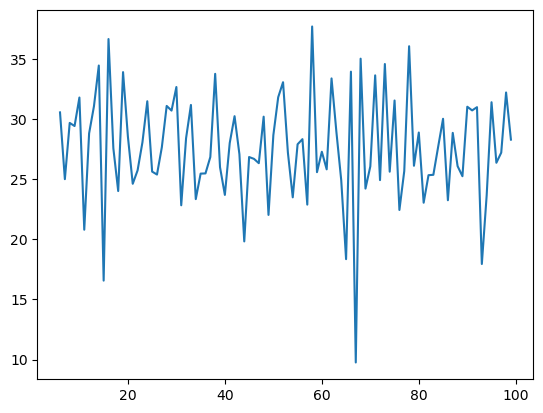

In [77]:
fig, ax = plt.subplots(1, 1)
ax.plot(dataf.loc[6:, "Step"], dataf.loc[6:, "Value"])